In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
dataframe=pd.read_csv('Life Expectancy Data.csv')
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
dataframe.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [5]:
dataframe['Life expectancy '].fillna(dataframe['Life expectancy '].median(),inplace=True)
dataframe['Adult Mortality'].fillna(dataframe['Adult Mortality'].median(),inplace=True)
dataframe['Alcohol'].fillna(dataframe['Alcohol'].median(),inplace=True)
dataframe['Hepatitis B'].fillna(dataframe['Hepatitis B'].median(),inplace=True)
dataframe[' BMI '].fillna(dataframe[' BMI '].median(),inplace=True)
dataframe['Polio'].fillna(dataframe['Polio'].median(),inplace=True)
dataframe['Total expenditure'].fillna(dataframe['Total expenditure'].median(),inplace=True)
dataframe['Diphtheria '].fillna(dataframe['Diphtheria '].median(),inplace=True)
dataframe['GDP'].fillna(dataframe['GDP'].median(),inplace=True)
dataframe['Population'].fillna(dataframe['Population'].median(),inplace=True)
dataframe[' thinness  1-19 years'].fillna(dataframe[' thinness  1-19 years'].median(),inplace=True)
dataframe['Income composition of resources'].fillna(dataframe['Income composition of resources'].median(),inplace=True)
dataframe['Schooling'].fillna(dataframe['Schooling'].median(),inplace=True)
dataframe[' thinness 5-9 years'].fillna(dataframe[' thinness 5-9 years'].median(),inplace=True)


In [6]:
dataframe.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

In [7]:
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
dataframe.drop(['Country','Status'],axis=1,inplace=True)

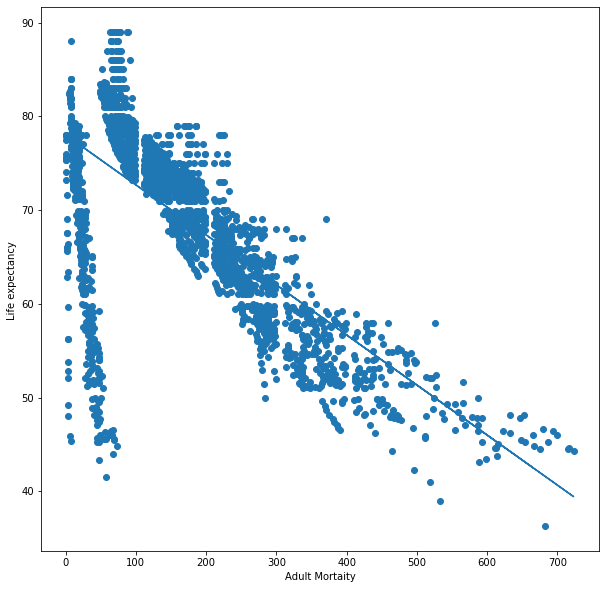

In [9]:
plt.figure(figsize=(10,10))
plt.xlabel('Adult Mortaity')
plt.ylabel('Life expectancy ')
plt.scatter(dataframe['Adult Mortality'], dataframe['Life expectancy '])
m,b=np.polyfit(dataframe['Adult Mortality'], dataframe['Life expectancy '],1)
plt.plot(dataframe['Adult Mortality'],m*dataframe['Adult Mortality']+b)

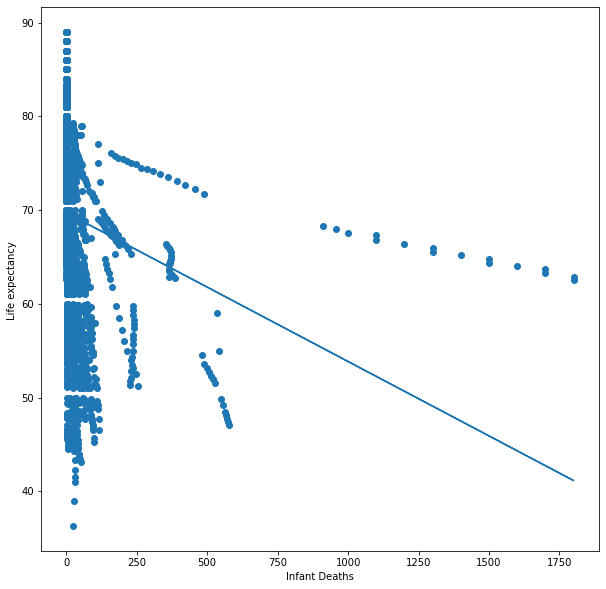

In [10]:
plt.figure(figsize=(10,10))
plt.xlabel('Infant Deaths')
plt.ylabel('Life expectancy ')
plt.scatter(dataframe['infant deaths'], dataframe['Life expectancy '])
m,b=np.polyfit(dataframe['infant deaths'], dataframe['Life expectancy '],1)
plt.plot(dataframe['infant deaths'], m*dataframe['infant deaths']+b)

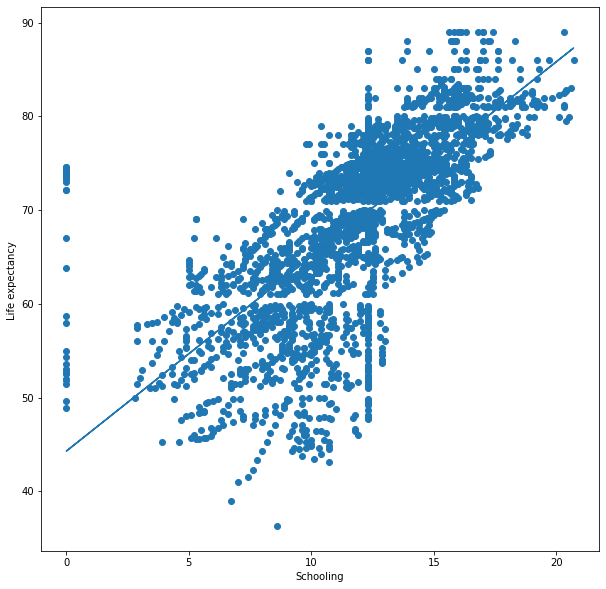

In [11]:
plt.figure(figsize=(10,10))
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.scatter(dataframe['Schooling'], dataframe['Life expectancy '])
m,b=np.polyfit(dataframe['Schooling'], dataframe['Life expectancy '],1)
plt.plot(dataframe['Schooling'], m*dataframe['Schooling']+b)

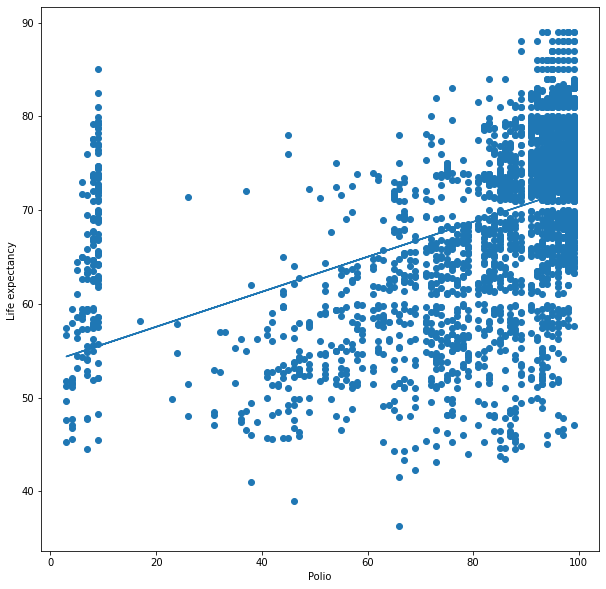

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel('Polio')
plt.ylabel('Life expectancy ')
plt.scatter(dataframe['Polio'], dataframe['Life expectancy '])
m,b=np.polyfit(dataframe['Polio'], dataframe['Life expectancy '],1)
plt.plot(dataframe['Polio'], m*dataframe['Polio']+b)

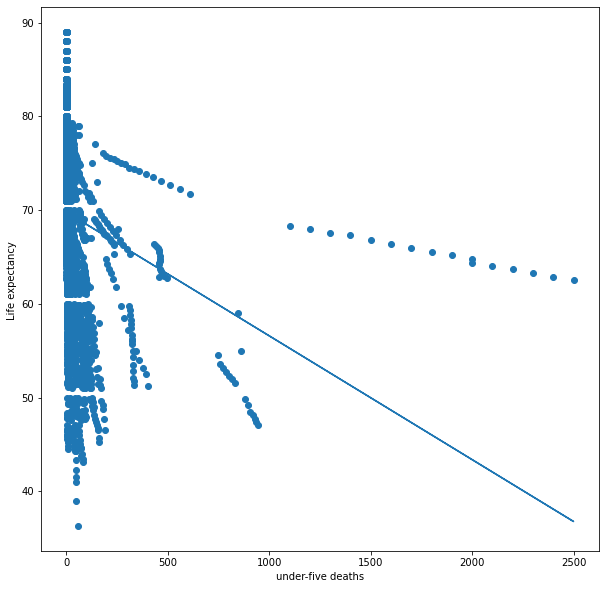

In [13]:
plt.figure(figsize=(10,10))
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy ')
plt.scatter(dataframe['under-five deaths '], dataframe['Life expectancy '])
m,b=np.polyfit(dataframe['under-five deaths '], dataframe['Life expectancy '],1)
plt.plot(dataframe['under-five deaths '], m*dataframe['under-five deaths ']+b)

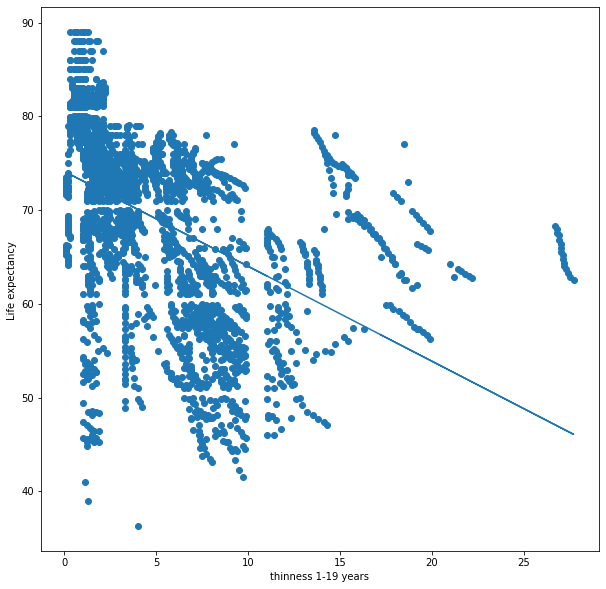

In [14]:
plt.figure(figsize=(10,10))
plt.xlabel('thinness 1-19 years')
plt.ylabel('Life expectancy ')
plt.scatter(dataframe[' thinness  1-19 years'], dataframe['Life expectancy '])
m,b=np.polyfit(dataframe[' thinness  1-19 years'], dataframe['Life expectancy '],1)
plt.plot(dataframe[' thinness  1-19 years'], m*dataframe[' thinness  1-19 years']+b)

In [15]:
y=dataframe['Life expectancy ']
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [16]:
x=dataframe

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(xtrain,ytrain)

LinearRegression()

In [19]:
lreg.score(xtrain,ytrain)

1.0

In [20]:
lreg.score(xtest,ytest)

1.0

In [21]:
print(lreg.intercept_)
print(lreg.coef_)

-2.434360197867136e-07
[ 1.29555717e-10  1.00000000e+00 -9.75616078e-12  4.44715730e-11
  4.58541451e-11 -1.75217635e-14  2.87710538e-12 -2.16499129e-14
  1.38807428e-12 -4.98523876e-11  1.72137140e-11 -5.94085219e-11
 -1.56356320e-11  1.41617892e-12  6.66546606e-15 -8.70798039e-17
 -4.20048589e-16 -3.43099581e-16 -7.00331519e-16 -9.44431816e-17]


In [22]:
ypred=lreg.predict(xtest)

In [26]:
from sklearn import metrics
print("Mean Absolute error is: ",metrics.mean_absolute_error(ytest,ypred))

Mean Absolute error is:  2.180973515165459e-09
